#                Sleep Data and Samsung Health Data Analysis

##                                            Yilak A. Kebede

##                                                     Sleep Data Analysis : Par1

### Important libraries 

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime 
from matplotlib.ticker import PercentFormatter
from numpy.polynomial.polynomial import polyfit
import math
from pandas import Series, DataFrame
from matplotlib.dates import DateFormatter

### The most common bedtime hours and wake up hours


In [96]:
df=pd.read_csv("C:/Users/user/Desktop/sleepdata.csv",';') 
df.head();

In [97]:
#examining for null values
for col in df.columns:
    if (df[col].isnull().any()):
        print ("Null values in %s is %d" %(col, df[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
df.shape

No null values in Start
No null values in End
No null values in Sleep quality
No null values in Time in bed
Null values in Wake up is 538
Null values in Sleep Notes is 538
Null values in Heart rate is 533
No null values in Activity (steps)


(538, 8)

In [98]:
# extracting required values 
df_Start= df.Start.str.slice(0,-9)
df_End = df.End.str.slice(0,-9)
df['Sleep quality']=df['Sleep quality'].str[:-1].astype(int)

# Bed time and wake up times 

<function matplotlib.pyplot.show(*args, **kw)>

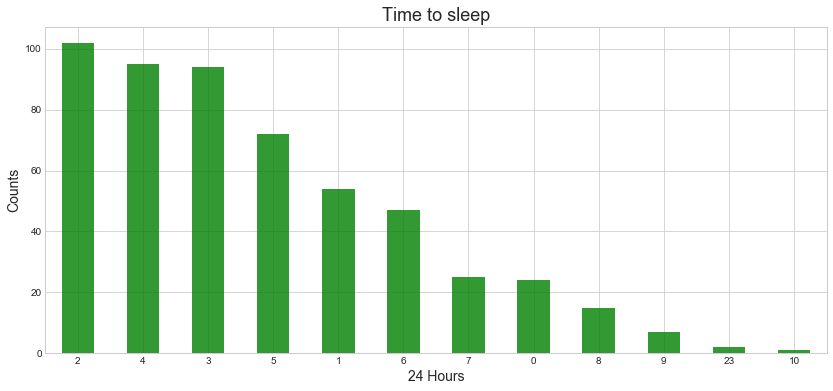

In [99]:
bedtime=pd.to_datetime(df.Start).dt.hour
waketime=pd.to_datetime(df.End).dt.hour
fig = plt.figure(figsize = (14,6))  
pd.value_counts(bedtime).plot.bar(color= 'g', alpha=0.8)
plt.xlabel("24 Hours", fontsize=14)
plt.title('Time to sleep', fontsize=18)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

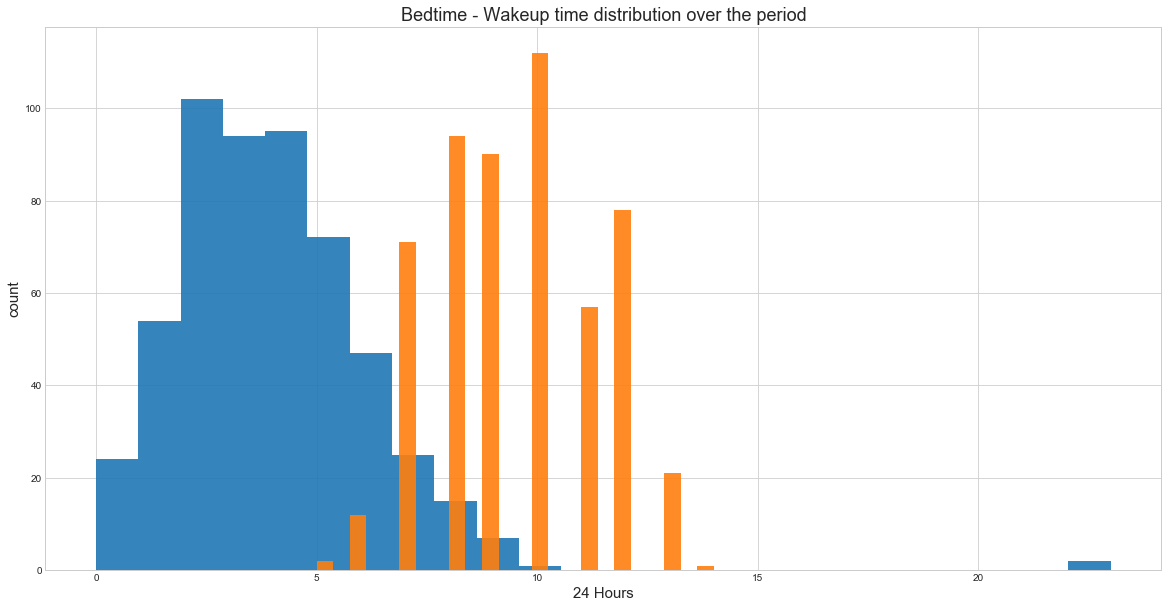

In [100]:
fig= plt.figure(figsize=(20,10))
plt.hist(bedtime, histtype='stepfilled', alpha=0.9, bins= 24)
plt.hist(waketime, histtype='stepfilled', alpha=0.9,bins= 24)
plt.xticks(rotation=0)
plt.title('Bedtime - Wakeup time distribution over the period', fontsize=18)
plt.xlabel('24 Hours', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show

### Conclusion 
The most common bedtime hours are from 2pm-4pm in the 24 hours period and the most common wake up hours are between 8pm-10pm. The sleep pattern entails the person is not classified as a' morning people' and further investigations are needed on how his sleeping habit is affected by activities (steps). Besides, there are sometimes when the person's bedtime and wake up hours overlapped, which 7 pm accounts for maximum accounts in this regard. The most common bedtime hours are from 2pm-4pm in the 24 hours period and the most common wake up hours are between 8pm-10pm. The sleep pattern entails the person is not classified as a' morning people' and further investigations are needed on how his sleeping habit is affected by activities (steps). Besides, there are sometimes when the person's bedtime and wake up hours overlapped, which 7 pm accounts for maximum accounts in this regard.

## Sleep Duration:

How long slept for when fell asleep. 

Can plot a histogram based on minutes of sleep

In [101]:
# slicing the date from the "Start"
df['StartDate']= df.Start.str.slice(-19,-9)
df['StartDate']=pd.to_datetime(df['StartDate']);

In [102]:
# calulating the average hours in bed and the summary of the duration
SleepDesc= pd.DataFrame(df['Time in bed'].str.slice(-4,-3).astype(int)).describe().transpose()
avgSleepHours = round(SleepDesc.at['Time in bed','mean'],2)
summary = 'Averaging a sleep of {} hours with a deviation of {} hours'.format(avgSleepHours, round(SleepDesc.at['Time in bed','std'],2))
print(summary)

Averaging a sleep of 5.37 hours with a deviation of 1.25 hours


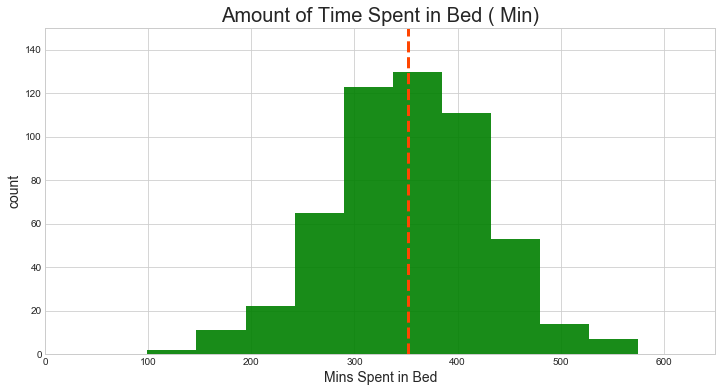

In [103]:
# ploting histogram with  10 bins
df['Time mins in bed']=df['Time in bed'].str.slice(-4,-3).astype(float)
hourslept=df['Time in bed'].str.slice(-4,-3).astype(int)
minsslept=df['Time in bed'].str.slice(-2,).astype(int)
totalslept=(hourslept*60)+minsslept
df['Total mins in Bed']=totalslept
fig = plt.figure(figsize = (12,6))
df['Total mins in Bed'].plot(kind='hist',bins=10, facecolor='g',alpha=0.9)
plt.xlabel('Mins Spent in Bed',fontsize=14); plt.ylabel('count', fontsize=14)
plt.title('Amount of Time Spent in Bed ( Min)',fontsize=20)
plt.axvline(df['Total mins in Bed'].mean(), color='orangered', linestyle='dashed', linewidth=3)
plt.axis([0,650,0,150])
plt.grid(True)
plt.show()


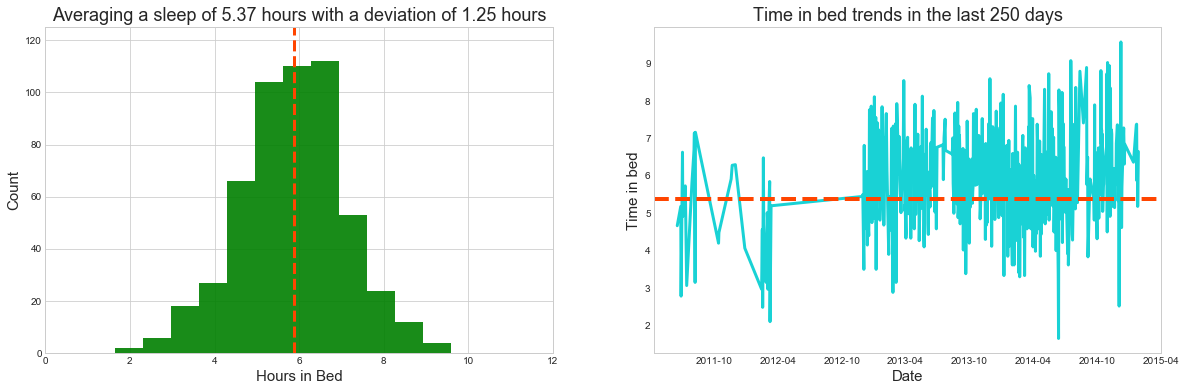

In [104]:
#Calculating the total time in bed in hour and mins
hourslept=df['Time in bed'].str.slice(-4,-3).astype(int)
minsslept=df['Time in bed'].str.slice(-2,).astype(int)
totalhourslept=(hourslept)+minsslept/60

totalminslept=(hourslept*60)+minsslept
df['Total mins in Bed']=totalminslept

# plotting 'hours in bed' histogram on 12 bins

fig = plt.figure(figsize = (20,6))
ax = plt.subplot(121)  
plt.hist(totalhourslept,bins=12, facecolor="g",alpha=0.9)
plt.xlabel('Hours in Bed', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title(summary, fontsize=18)
plt.axvline(totalhourslept.mean(), color='orangered', linestyle='dashed', linewidth=3)
plt.style.use('seaborn-whitegrid')
plt.axis([0,12,0,125])

#plotting the "time in bed" trend for the last 250 days
ax2 = fig.add_subplot(122)
plt.plot(df['StartDate'],totalhourslept, linestyle='-', markersize=10, color='darkturquoise', label='% Light', linewidth=3.0, alpha=0.9)
plt.ylabel('Time in bed', fontsize=15)
plt.xlabel('Date', fontsize=15)
ax2.axhline(avgSleepHours, color="orangered", linestyle='--',linewidth=4)
ax2.grid(False)
plt.title('Time in bed trends in the last 250 days', fontsize=18)
plt.style.use('seaborn-whitegrid')
plt.plot();

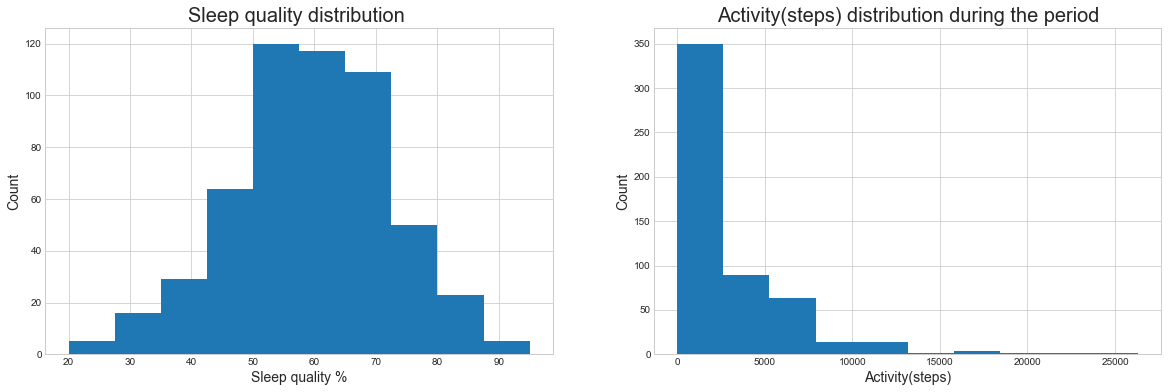

In [105]:
fig = plt.figure(figsize = (20,6))
ax = plt.subplot(121) 
df['Sleep quality'].hist()
plt.title('Sleep quality distribution ',fontsize=20)
plt.xlabel('Sleep quality %', fontsize=14)
plt.ylabel('Count',fontsize=14 );
ax2=fig.add_subplot(122)
df['Activity (steps)'].hist()
plt.title('Activity(steps) distribution during the period',fontsize=20)
plt.xlabel('Activity(steps)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

## Conclusion
On the average, the person slept for about 5 hours and 37 minutes per night. From the digram that shows the trend of "time in bed", the mean is probably pulled up by some outliers. Besides, the person had less than 2500 steps in majority of days and this could probably affects his/her sleeping quality. In the next, session I will see the correlation b/n the activities and sleeping quality.

# Sleep Duration Over Time:

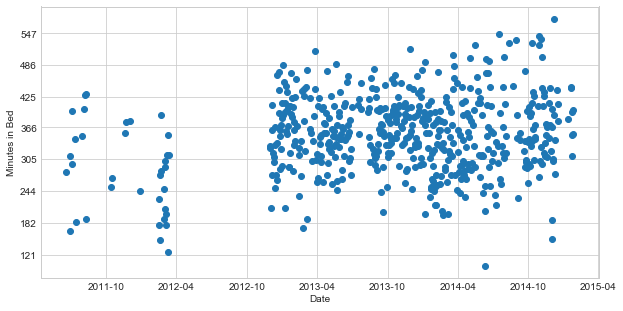

In [106]:
totalminslept=df['Total mins in Bed']
plt.figure(figsize=(10,5))
plt.plot_date(df['StartDate'],df['Total mins in Bed'], ydate=True)
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()]) 
plt.xlabel('Date');plt.ylabel('Minutes in Bed')
plt.show()

In [107]:
np.corrcoef(df['Sleep quality'], df['Total mins in Bed'])

array([[1.        , 0.82387049],
       [0.82387049, 1.        ]])

<function matplotlib.pyplot.show(*args, **kw)>

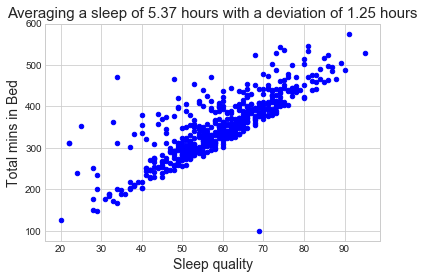

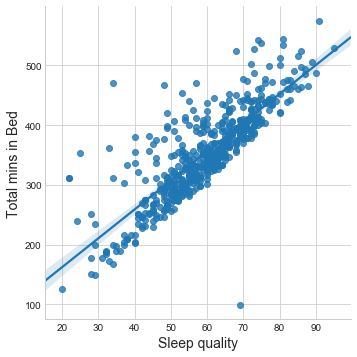

In [108]:
df.plot(kind='scatter',x= 'Sleep quality',y='Total mins in Bed', color='blue')
plt.xlabel('Sleep quality', fontsize=14)
plt.ylabel('Total mins in Bed', fontsize=14)
plt.title(summary, fontsize=15)
sns.lmplot(y='Total mins in Bed',x='Sleep quality', data=df)
plt.xlabel('Sleep quality', fontsize=14)
plt.ylabel('Total mins in Bed', fontsize=14)
plt.show

[]

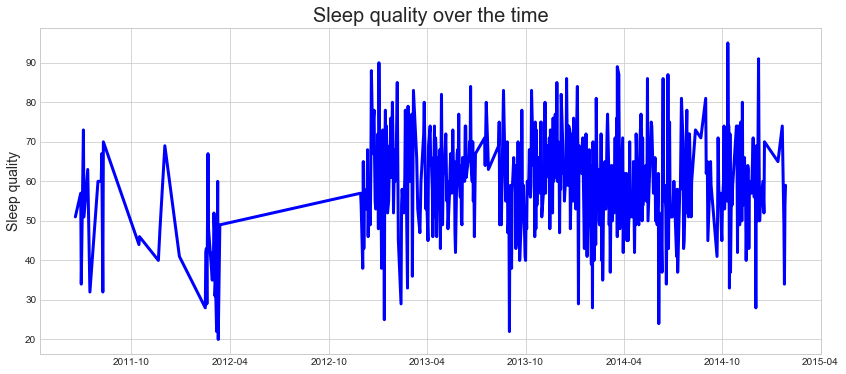

In [109]:
fig=plt.figure(figsize=(14,6))
plt.plot(df['StartDate'],df['Sleep quality'], linestyle='-', markersize=10, color='b', label='% Light', linewidth=3.0)
plt.ylabel('Sleep quality', fontsize=14)
ax2.grid(True)
plt.title("Sleep quality over the time", fontsize=20)
plt.xticks(rotation=0)
plt.plot()

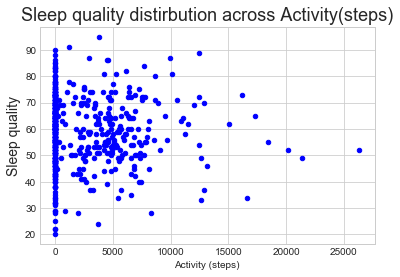

In [110]:
df.plot(kind='scatter',x= 'Activity (steps)',y='Sleep quality', color='blue')
plt.ylabel('Sleep quality', fontsize=14)
plt.title('Sleep quality distirbution across Activity(steps)',fontsize=18)
plt.show()

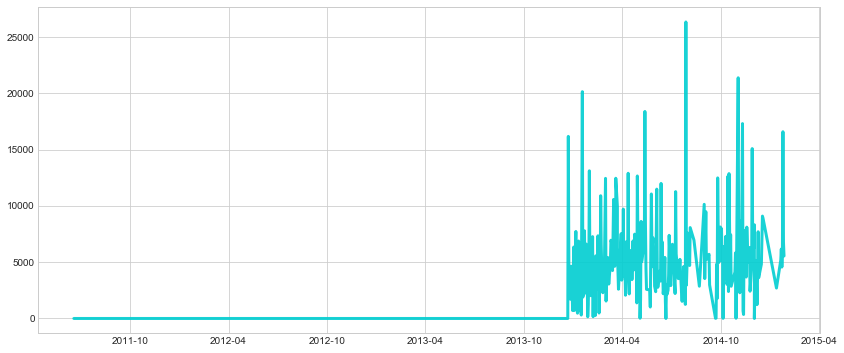

In [111]:
fig=plt.figure(figsize=(14,6))
plt.plot(df['StartDate'],df['Activity (steps)'], linestyle='-', markersize=10, color='darkturquoise', linewidth=3.0, alpha=0.9)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

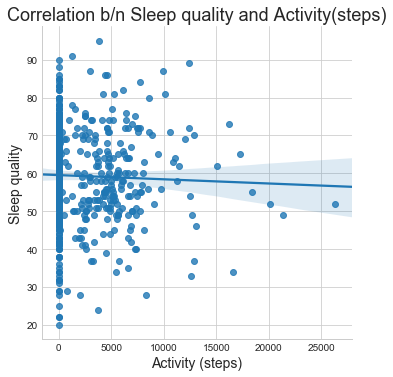

In [116]:
sns.lmplot(y='Sleep quality',x='Activity (steps)', data=df)
plt.xlabel('Activity (steps)', fontsize=14)
plt.ylabel('Sleep quality', fontsize=14)
plt.title('Correlation b/n Sleep quality and Activity(steps)',fontsize=18)
plt.show

In [118]:
# groupby the sleep quality data to reduce into 10 group
ranges = [20,50,80,100]
df['Sleep quality']= df.groupby(pd.cut(df['Sleep quality'], ranges)).count();

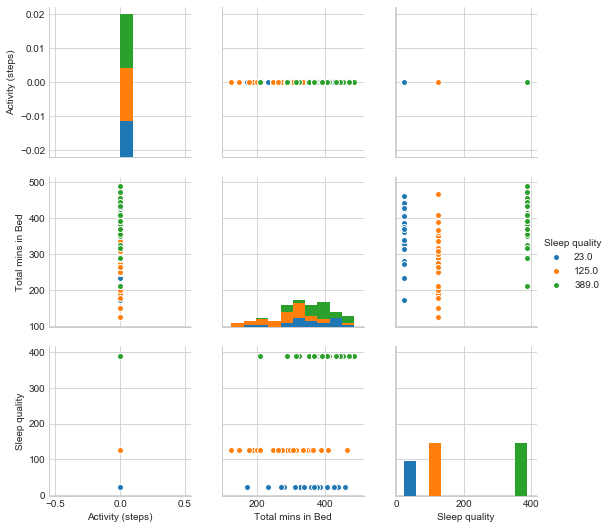

In [119]:
sns.pairplot(hue = 'Sleep quality', data = df[['Activity (steps)','Total mins in Bed', 'Sleep quality']])

## Conclusion 
The sleep quality and activity (steps) relationship is not that strong as I anticipated, however the relationship between the sleep quality and the total mins spent on bed have strong relationship with a correlation cof. of > 0.8. 

# Part 2: Sumsung Health Data Analysis 

## Importing and shaping "sleep-export2" file

In [120]:
Sam_df=pd.read_csv("C:/Users/user/Desktop/samsung/sleep-export2.csv")
Sam_df.head();

In [121]:
#shaping the dataframe by removing some of the columns via drop function 
col_to_remove=['com.samsung.health.sleep.custom' , 'original_efficiency', 'original_bed_time', 'original_wake_up_time']
Sam_df.drop(columns=col_to_remove, inplace=True);

In [122]:
# simplifying the dataframe columns name further via dictionary
col_rename_dict = {"com.samsung.health.sleep.datauuid"   : "uuid",
                   "com.samsung.health.sleep.time_offset": "time_offset",
                   "com.samsung.health.sleep.end_time"   : "end_time",
                   "com.samsung.health.sleep.start_time" : "start_time",
                   "com.samsung.health.sleep.create_time": "create_time",
                   "com.samsung.health.sleep.update_time": "update_time"}
Sam_df.rename(columns=col_rename_dict, inplace=True);

In [123]:
# processing the dataframe for possible null values
for col in Sam_df.columns:
    if (Sam_df[col].isnull().any()):
        print ("Null values in %s is %d" %(col, Sam_df[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
Sam_df.shape;

No null values in Unnamed: 0
No null values in efficiency
Null values in has_sleep_data is 2
No null values in uuid
Null values in quality is 241
No null values in end_time
No null values in start_time
No null values in time_offset
No null values in update_time
No null values in create_time


In [124]:
# converting UTC
def convert_ms_to_date_time_with_offset (df_series):
    
    ## Convert to UTC Date+Time
    df_series = pd.to_datetime(arg=df_series,unit='ms')
    
    ## Timezone conversion to local time
    df_series = df_series.dt.tz_localize("UTC").dt.tz_convert("Canada/Atlantic")
    
    return df_series

Sam_df["start_time"] = convert_ms_to_date_time_with_offset(Sam_df["start_time"])
Sam_df["end_time"]   = convert_ms_to_date_time_with_offset(Sam_df["end_time"]);

## Importing and shaping "heart_rate" file 

In [125]:
Sam_df_rate= pd.read_csv("C:/Users/user/Desktop/samsung/heart_rate.csv")
Sam_df_rate.tail();

In [126]:
#shaping the dataframe by renaing and removing some of the columns via drop function 
col_rename_dict={"datauuid":"uuid"}
Sam_df_rate.rename(columns=col_rename_dict, inplace=True)
col_to_remove=['pkg_name' ,'binning_data']
Sam_df_rate.drop(columns=col_to_remove, inplace=True);

In [127]:
# clarifying null  values
for col in Sam_df_rate.columns:
    if (Sam_df_rate[col].isnull().any()):
        print ("Null values in %s is %d" %(col, Sam_df_rate[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
Sam_df_rate.shape;

No null values in Unnamed: 0
No null values in end_time
No null values in heart_rate
No null values in start_time
No null values in heart_beat_count
No null values in update_time
Null values in max is 17
Null values in min is 17
No null values in time_offset
No null values in uuid
No null values in create_time


In [128]:
# adjusting the time zone UTC
def convert_ms_to_date_time_with_offset (df_series):
    
    ## Convert to UTC Date+Time
    df_series = pd.to_datetime(arg=df_series)
    
    ## Timezone conversion to local time
    df_series = df_series.dt.tz_localize("UTC").dt.tz_convert("Canada/Atlantic")
    
    return df_series

Sam_df_rate["start_time"] = convert_ms_to_date_time_with_offset(Sam_df_rate["start_time"])
Sam_df_rate["end_time"]   = convert_ms_to_date_time_with_offset(Sam_df_rate["end_time"]);

## Importing and shaping "floor climbed" file

In [129]:
Sam_df_fcl= pd.read_csv("C:/Users/user/Desktop/samsung/floors_climbed.csv")
Sam_df_fcl.head();

In [130]:
#shaping the dataframe by renaming and removing 
col_rename_dict={"datauuid":"uuid"}
Sam_df_fcl.rename(columns=col_rename_dict, inplace=True)
col_to_remove=['pkg_name']
Sam_df_fcl.drop(columns=col_to_remove, inplace=True);

In [131]:
#clarifying the null values
for col in Sam_df_fcl.columns:
    if (Sam_df_fcl[col].isnull().any()):
        print ("Null values in %s is %d" %(col, Sam_df_fcl[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
Sam_df_fcl.shape;

No null values in Unnamed: 0
No null values in end_time
No null values in time_offset
No null values in start_time
No null values in floor
No null values in uuid
No null values in update_time
No null values in create_time


In [132]:
# adjusting the time zone UTC
def convert_ms_to_date_time_with_offset (df_series):
    
    ## Convert to UTC Date+Time
    df_series = pd.to_datetime(arg=df_series)
    
    ## Timezone conversion to local time
    df_series = df_series.dt.tz_localize("UTC").dt.tz_convert("Canada/Atlantic")
    
    return df_series

Sam_df_fcl["start_time"] = convert_ms_to_date_time_with_offset(Sam_df_fcl["start_time"])
Sam_df_fcl["end_time"]   = convert_ms_to_date_time_with_offset(Sam_df_fcl["end_time"]);

## Importing and shaping "step-count" file

In [133]:
Sam_df_step= pd.read_csv("C:/Users/user/Desktop/samsung/step_count.csv")
Sam_df_step.head();

In [134]:
# Shaping the dateframe by renaming an dremoving some columns
col_rename_dict={"datauuid":"uuid"}
Sam_df_step.rename(columns=col_rename_dict, inplace=True)
col_to_remove=['pkg_name']
Sam_df_step.drop(columns=col_to_remove, inplace=True);

In [135]:
for col in Sam_df_step.columns:
    if (Sam_df_step[col].isnull().any()):
        print ("Null values in %s is %d" %(col, Sam_df_step[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
Sam_df_step.shape;

No null values in Unnamed: 0
No null values in end_time
No null values in start_time
No null values in count
No null values in calorie
No null values in update_time
No null values in speed
No null values in time_offset
No null values in distance
No null values in uuid
No null values in create_time


In [136]:
def convert_ms_to_date_time_with_offset (df_series):
    
    ## Convert to UTC Date+Time
    df_series = pd.to_datetime(arg=df_series)
    
    ## Timezone conversion to local time
    df_series = df_series.dt.tz_localize("UTC").dt.tz_convert("Canada/Atlantic")
    
    return df_series

Sam_df_step["start_time"] = convert_ms_to_date_time_with_offset(Sam_df_step["start_time"])
Sam_df_step["end_time"]   = convert_ms_to_date_time_with_offset(Sam_df_step["end_time"])

## Importing and shaping "excercise" file

In [143]:
Sam_df_exc= pd.read_csv("C:/Users/user/Desktop/samsung/exercise.csv")
Sam_df_exc.head();

In [144]:
#shaping the dataframe by renaming and removing some of the columns via drop function 
col_rename_dict={"datauuid":"uuid"}
Sam_df_exc.rename(columns=col_rename_dict, inplace=True)
col_to_remove=['altitude_loss','max_altitude','altitude_gain','min_heart_rate','exercise_custom_type','live_data','count_type','max_caloricburn_rate','custom','comment','additional']
Sam_df_exc.drop(columns=col_to_remove, inplace=True);

In [145]:
for col in Sam_df_exc.columns:
    if (Sam_df_exc[col].isnull().any()):
        print ("Null values in %s is %d" %(col, Sam_df_exc[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
Sam_df_exc.shape;

No null values in Unnamed: 0
No null values in end_time
No null values in start_time
Null values in count is 305
No null values in duration
No null values in deviceuuid
Null values in max_heart_rate is 122
Null values in max_rpm is 341
Null values in mean_heart_rate is 122
No null values in pkg_name
Null values in max_cadence is 121
No null values in time_offset
Null values in mean_caloricburn_rate is 341
Null values in incline_distance is 290
No null values in exercise_type
Null values in decline_distance is 290
Null values in max_speed is 85
Null values in mean_power is 341
Null values in max_power is 341
Null values in mean_rpm is 341
No null values in calorie
Null values in mean_cadence is 121
Null values in mean_speed is 12
No null values in update_time
Null values in min_altitude is 331
Null values in distance is 12
No null values in uuid
No null values in create_time


In [146]:
def convert_ms_to_date_time_with_offset (df_series):
    
    ## Convert to UTC Date+Time
    df_series = pd.to_datetime(arg=df_series)
    
    ## Timezone conversion to local time
    df_series = df_series.dt.tz_localize("UTC").dt.tz_convert("Canada/Atlantic")
    
    return df_series

Sam_df_exc["start_time"] = convert_ms_to_date_time_with_offset(Sam_df_exc["start_time"])
Sam_df_exc["end_time"]   = convert_ms_to_date_time_with_offset(Sam_df_exc["end_time"]);

### Sorting and viewing  the above files

In [147]:
Sam_df.sort_values(ascending=True, by=["start_time"])
Sam_df_rate.sort_values(ascending=True, by=["start_time"])
Sam_df_fcl.sort_values(ascending=True, by=["start_time"])
Sam_df_step.sort_values(ascending=True, by=["start_time"])
Sam_df_exc.sort_values(ascending=True, by=["start_time"]);

# merging the all five dataframes- from left and selfmade key-"uuid"


In [149]:
Sam_df_merge1= pd.merge(left=Sam_df, right=Sam_df_rate, how="left", on="uuid")
Sam_df_merge1.shape

(279, 20)

In [150]:
Sam_df_merge2= pd.merge( left= Sam_df_merge1, right=Sam_df_fcl, how="left",on="uuid")
Sam_df_merge2.shape

(279, 27)

In [151]:
Sam_df_merge3= pd.merge(left=Sam_df_merge2,right=Sam_df_step,how="left", on="uuid")
Sam_df_merge3.shape

(279, 37)

In [158]:
Sam_df_m= pd.merge(left=Sam_df_merge3,right=Sam_df_step,how="left", on="uuid")
Sam_df_m.tail()

,Unnamed: 0_x,efficiency,has_sleep_data,uuid,quality,end_time_x,start_time_x,time_offset_x,update_time_x,create_time_x,...,Unnamed: 0,end_time,start_time,count_y,calorie_y,update_time,speed_y,time_offset,distance_y,create_time
274,274,93.93939,1.0,fa6d8e8e-a9ef-8a12-2378-30600e77dfe5,NaN,2018-04-15 06:46:00-03:00,2018-04-14 22:32:00-03:00,UTC-0300,1523785624251,1523785624251,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,275,93.31849,1.0,fb8c3f14-65d0-40e1-75a8-28b6a8297dcb,NaN,2018-06-22 07:22:00-03:00,2018-06-21 23:53:00-03:00,UTC-0300,1529662962362,1529662962362,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,276,90.83970,1.0,fd2cc77d-a9f3-13c3-965f-a166db7a0e2c,NaN,2018-05-20 09:16:00-03:00,2018-05-20 02:44:00-03:00,UTC-0300,1526819445314,1526819445314,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,277,93.56137,1.0,fd50d8c9-fd11-b1e0-011f-10714d984fac,NaN,2018-06-19 06:30:00-03:00,2018-06-18 22:14:00-03:00,UTC-0300,1529400689041,1529400689041,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,278,92.77778,1.0,fde67d6c-4823-6520-e0f4-888aeb7372c5,NaN,2018-06-18 06:46:00-03:00,2018-06-18 00:47:00-03:00,UTC-0300,1529316061351,1529316061351,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
Sam_df_m.columns

Index(['Unnamed: 0_x', 'efficiency', 'has_sleep_data', 'uuid', 'quality',
       'end_time_x', 'start_time_x', 'time_offset_x', 'update_time_x',
       'create_time_x', 'Unnamed: 0_y', 'end_time_y', 'heart_rate',
       'start_time_y', 'heart_beat_count', 'update_time_y', 'max', 'min',
       'time_offset_y', 'create_time_y', 'Unnamed: 0_x', 'end_time_x',
       'time_offset_x', 'start_time_x', 'floor', 'update_time_x',
       'create_time_x', 'Unnamed: 0_y', 'end_time_y', 'start_time_y',
       'count_x', 'calorie_x', 'update_time_y', 'speed_x', 'time_offset_y',
       'distance_x', 'create_time_y', 'Unnamed: 0', 'end_time', 'start_time',
       'count_y', 'calorie_y', 'update_time', 'speed_y', 'time_offset',
       'distance_y', 'create_time'],
      dtype='object')

# Samsung summary analysis 

In [163]:
Sum_df=pd.read_csv("C:/Users/user/Desktop/samsung/summary.csv")
Sum_df.head();

In [164]:
# processing the dataframe for possible null values
for col in Sum_df.columns:
    if (Sum_df[col].isnull().any()):
        print ("Null values in %s is %d" %(col, Sam_df[col].isnull().sum()))
    else:
        print ("No null values in %s" %(col))
Sum_df.shape;

No null values in create_time
No null values in longest_idle_time
No null values in score
No null values in extra_data
No null values in goal
No null values in calorie
No null values in run_time
No null values in deviceuuid
No null values in update_time
No null values in longest_active_time
No null values in day_time
No null values in walk_time
No null values in pkg_name
No null values in active_time
No null values in distance
No null values in others_time
No null values in step_count
No null values in datauuid


In [165]:
for c_col in ['longest_idle_time','run_time','longest_active_time','day_time','walk_time','active_time','others_time']:
    Sum_df[c_col] = pd.to_datetime(Sum_df[c_col], unit='ms',infer_datetime_format=False)

In [166]:
Sum_df['StartDate']= Sum_df['create_time'].str.slice(-21,-13)
Sum_df['Date']=pd.to_datetime(Sum_df['StartDate'])

In [167]:
Sum_df['create_time']=pd.to_datetime(Sum_df.create_time).dt.hour
Sum_df['run_time']=pd.to_datetime(Sum_df.run_time).dt.hour
Sum_df['active_time']= pd.to_datetime(Sum_df.active_time).dt.hour
Sum_df['walk_time']=pd.to_datetime(Sum_df.walk_time).dt.hour

In [171]:
np.corrcoef(Sum_df['active_time'], Sum_df['calorie'])

array([[1.        , 0.90423451],
       [0.90423451, 1.        ]])

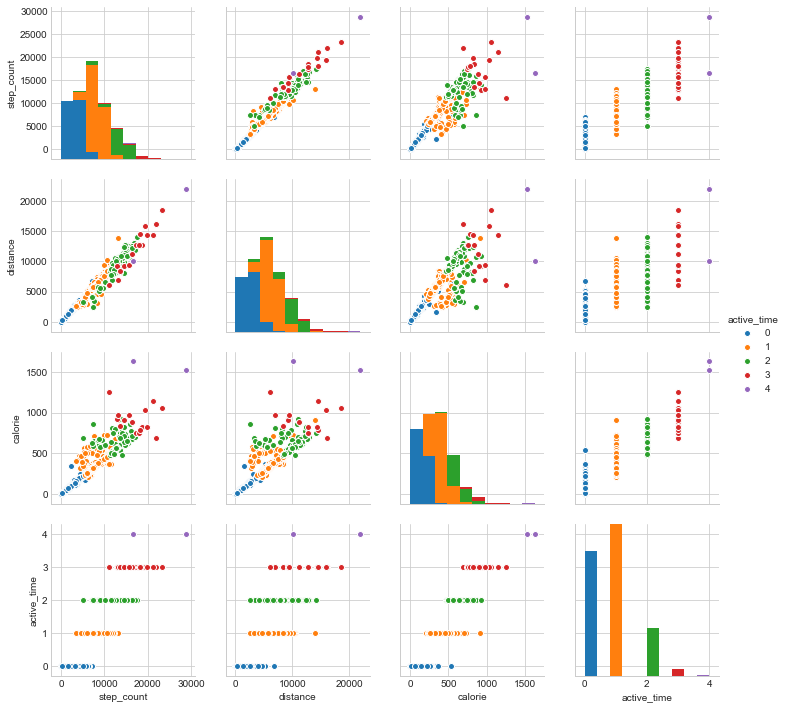

In [172]:
sns.pairplot(hue = 'active_time', data = Sum_df[['step_count','distance', 'calorie', 'active_time']])

<function matplotlib.pyplot.show(*args, **kw)>

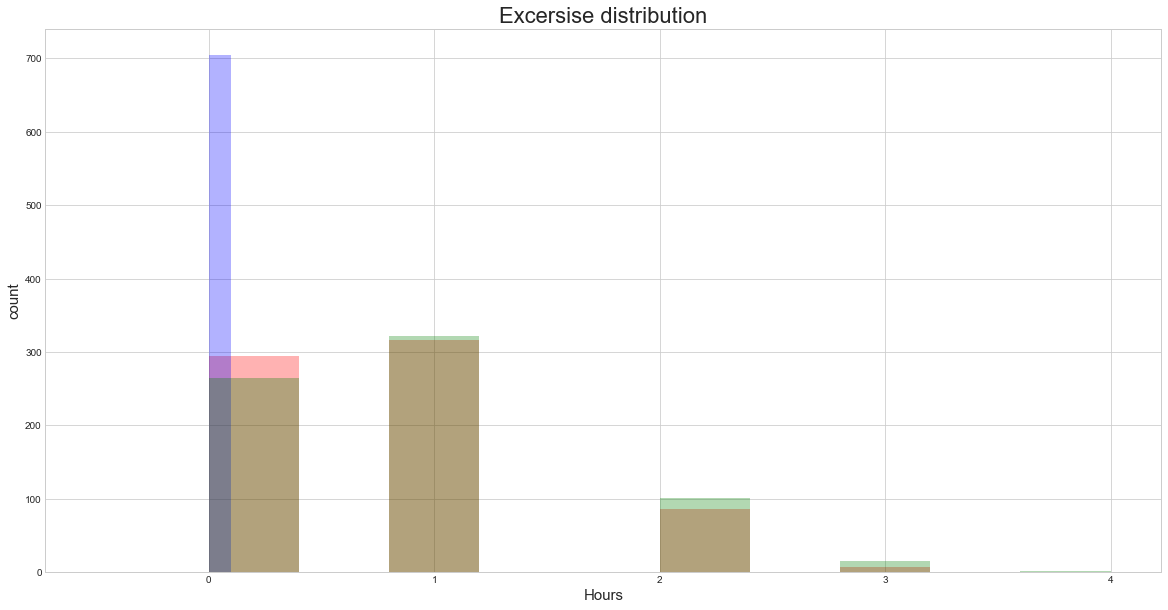

In [173]:
fig= plt.figure(figsize=(20,10))
plt.hist(Sum_df['walk_time'], histtype='stepfilled', alpha=0.3, bins= 10, color='r')
plt.hist(Sum_df['run_time'], histtype='stepfilled', alpha=0.3,bins= 10, color='b')
plt.hist(Sum_df['active_time'],histtype='stepfilled', alpha=0.3,bins= 10, color= 'g')
plt.title('Excersise distribution', fontsize=22)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.legend('')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

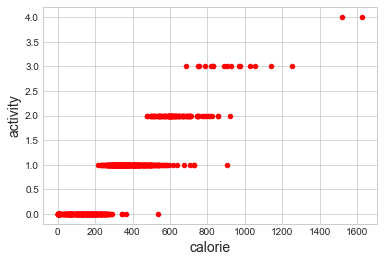

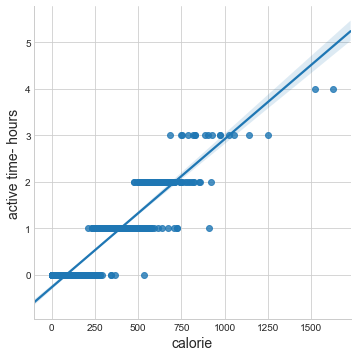

In [174]:
Sum_df.plot(kind='scatter',x= 'calorie',y='active_time' , color='r')
plt.xlabel('calorie', fontsize=14)
plt.ylabel('activity', fontsize=14)
sns.lmplot(y='active_time',x='calorie', data=Sum_df)
plt.xlabel('calorie', fontsize=14)
plt.ylabel('active time- hours', fontsize=14)
plt.show

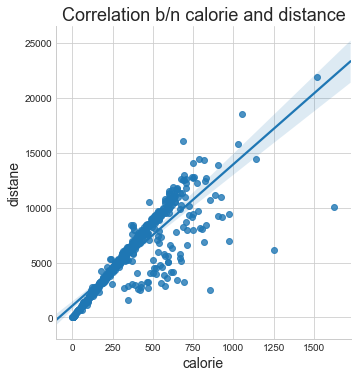

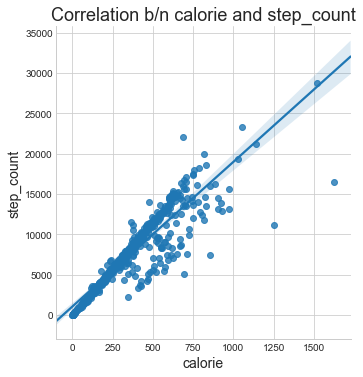

In [176]:
sns.lmplot(y='distance',x='calorie', data=Sum_df)
plt.xlabel('calorie', fontsize=14)
plt.ylabel('distane', fontsize=14)
plt.title('Correlation b/n calorie and distance',fontsize=18)

sns.lmplot(y='step_count',x='calorie', data=Sum_df)
plt.xlabel('calorie', fontsize=14)
plt.ylabel('step_count', fontsize=14)
plt.title('Correlation b/n calorie and step_count',fontsize=18)
plt.show;

# Conclusion:
The above graphs entails that the calorie burning has a very strong correlation with activity time (correlation cof. of > 0.9).  